# Preprocessing files 


In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import h5py
from python_speech_features import mfcc
import matplotlib.pyplot as plt
import tracemalloc

tracemalloc.start() # Enable memory profiling

#

## Find files, and list structure

In [2]:

# OS walk through the directory to find the files
root_dir = '//uni.au.dk/dfs/Tech_EarEEG/Students/Msc2022_BCM_AkselStark'
data = [] # Empty list to store all hdf5 files in the directory

for subdir, dirs, files in sorted(os.walk(root_dir)):
    for file in files:
        if "hdf5" in file:
            # Load the hdf5 file, and append to the list
            data.append(h5py.File(os.path.join(subdir, file), 'r'))
            
            print(f'{subdir}/{file}') # Print the filename
            keylist = list(data[0].keys())
            print( keylist) # Print the keys of the hdf5 file
            for i,j in enumerate(data):
                print(f'Index of the hdf5 file: {i}') # Print the index of the hdf5 file
                for key in keylist:
                    print(key)
                    try: # Try to print the keys. If it fails, print the data
                        print(f"    {list(data[i][key].keys())}")
                    except:
                        print("    No subkeys")
                        print(f"    {np.array(data[i][key])}")
                        s = data[i][key]
            

//uni.au.dk/dfs/Tech_EarEEG/Students/Msc2022_BCM_AkselStark\data/sourcedata_subj-01.hdf5
['DAQ970A', 'gTec', 'streaminfo']
Index of the hdf5 file: 0
DAQ970A
    ['data', 'labels']
gTec
    ['data', 'labels']
streaminfo
    No subkeys
    [(8, b'cf_float32', 8649.913, b'5125-240-003', b'gTec',  1200, b'gTecUSBamp_UB-2015.01-11', b'Mixed')
 (3, b'cf_float32', 8651.712, b'5125-240-003', b'DAQ970A', 50000, b'DAQ970A::TCPIP::192.168.56.100', b'Generic')]


## Load data, and calculate cepstrum

In [3]:
print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')
data_bcm = []
data_full = np.array(data[0]['DAQ970A']['data'])
data_bcm.append(data_full[:,0])
data_bcm.append(data_full[:,1])
print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')

pass

Memory usage: 0.12743 MB

Memory usage: 1493.107355 MB



In [4]:
data_mfcc = [] # Empty list to store the mel frequency cepstral coefficients (list of numpy arrays)

for datastream in data_bcm:
    if datastream.shape[0] > 100000000: # Crashes if the datastream is too long. Split into chunks
        section_len = int(datastream.shape[0]/4)
        data_mfcc.append(mfcc(datastream[0:section_len],samplerate = 50000, nfft = 1250)) # Sample rate is important when using mel scale
        print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')
        data_mfcc.append(mfcc(datastream[section_len : section_len * 2],samplerate = 50000, nfft = 1250)) 
        print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')
        data_mfcc.append(mfcc(datastream[section_len * 2 : section_len * 3],samplerate = 50000, nfft = 1250)) 
        print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')
        data_mfcc.append(mfcc(datastream[section_len * 3 :],samplerate = 50000, nfft = 1250)) 
        print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')
        
        #data_mfcc.append(mfcc(datastream[int(datastream.shape[0]/2):],samplerate = 50000, nfft = 1250)) # Sample rate is important when using mel scale
    else:
        #data_mfcc.append(mfcc(datastream,samplerate = 50000, nfft = 1250))
        print('!!!!!!!!!!!')
        pass
    

print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')




Memory usage: 1499.630736 MB

Memory usage: 1506.100419 MB

Memory usage: 1512.570147 MB

Memory usage: 1519.039859 MB

Memory usage: 1525.509603 MB

Memory usage: 1531.979339 MB

Memory usage: 1538.449051 MB

Memory usage: 1544.918763 MB

Memory usage: 1544.919437 MB



## Save to files

## Plot cepstrum


C:\Users\Aksel\AppData\Local\Temp\ipykernel_17936\1889299385.py:3: RuntimeWarning: invalid value encountered in log
  plt.pcolormesh(np.log(mfcc_test[0:50,1:].transpose()),shading='auto')


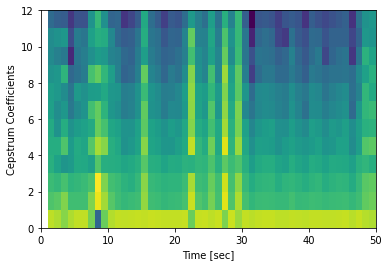

In [ ]:
# Plot spectrogram
#plt.pcolormesh(t[0:20], f, np.log(spectrogram_list[segment_index]),shading='auto')
plt.pcolormesh(np.log(mfcc_test[0:50,1:].transpose()),shading='auto')
plt.ylabel('Cepstrum Coefficients')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
pass